In [ ]:
%matplotlib widget

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from datetime import datetime
import os
from viewer_src import *
# from utils import *

In [ ]:
path_events = 'SauronData/'
list_events = [f.split('.')[0] for f in os.listdir('test')]

In [ ]:

bipolar_montage = init_montage_class(storage_channels = CDAC_monopolar_montage,
                                     montage_channels = CDAC_bipolar_montage,
                                     y_locations = -100*np.array([ 0,  1,  2,  3,
                                                                5,  6,  7,  8,
                                                                10, 11, 12, 13,
                                                                15, 16, 17, 18,
                                                                20, 21]),
                                     y_labels = CDAC_bipolar_montage
                                     )
                                     
avg_montage = init_montage_class(storage_channels = CDAC_monopolar_montage,
                                     montage_channels = [c+'-avg' for c in CDAC_monopolar_montage],
                                     y_locations = -100*np.array([ 0,  1,  2,  3, 4, 5,  6,  7,
                                                                   9,  10, 11,  
                                                                   13, 14, 15, 16, 17, 18, 20, 21]),
                                     y_labels = [channel+'-avg' for channel in CDAC_monopolar_montage]
                                     )
            

action_list = {
    '1': lambda: (change_montage(ax,viewer_module=viewer_module,montage_module=montage_module),refresh_wrapped()),
    '+': lambda: (scaling_module.increase(),scale_module.increase_y_scale(),refresh_wrapped()),
    '-': lambda: (scaling_module.decrease(),scale_module.decrease_y_scale(),refresh_wrapped()),
    'right': lambda: (om.next(),refresh_wrapped()),
    'left': lambda: (om.prev(),refresh_wrapped()),
    'p': lambda:(fig.savefig(os.path.join(om.path_save,om.savenames[om.idx])))
    # More entries...
    }

def refresh(ax,overview_module,event_module,montage_module,title_module,scaling_module,viewer_module):
    path_event = om.path_events[om.idx]
    
    signal = event_module.load_event(path_event)  
    signal = montage_module(signal)
    signal = scaling_module(signal)
    update_channels_with_signal(signal=signal,
                                channel_lines=viewer_module.channel_lines,
                                y_locations=viewer_module.y_locations) 

    title = om.titles[om.idx]
    ax.set_title(title)
    fig.tight_layout()
    plt.draw()


In [1]:
df_event = pd.read_excel('tables/batch2.xlsx')


NameError: name 'pd' is not defined

ValueError: Expected the given number of height ratios to match the number of rows of the grid

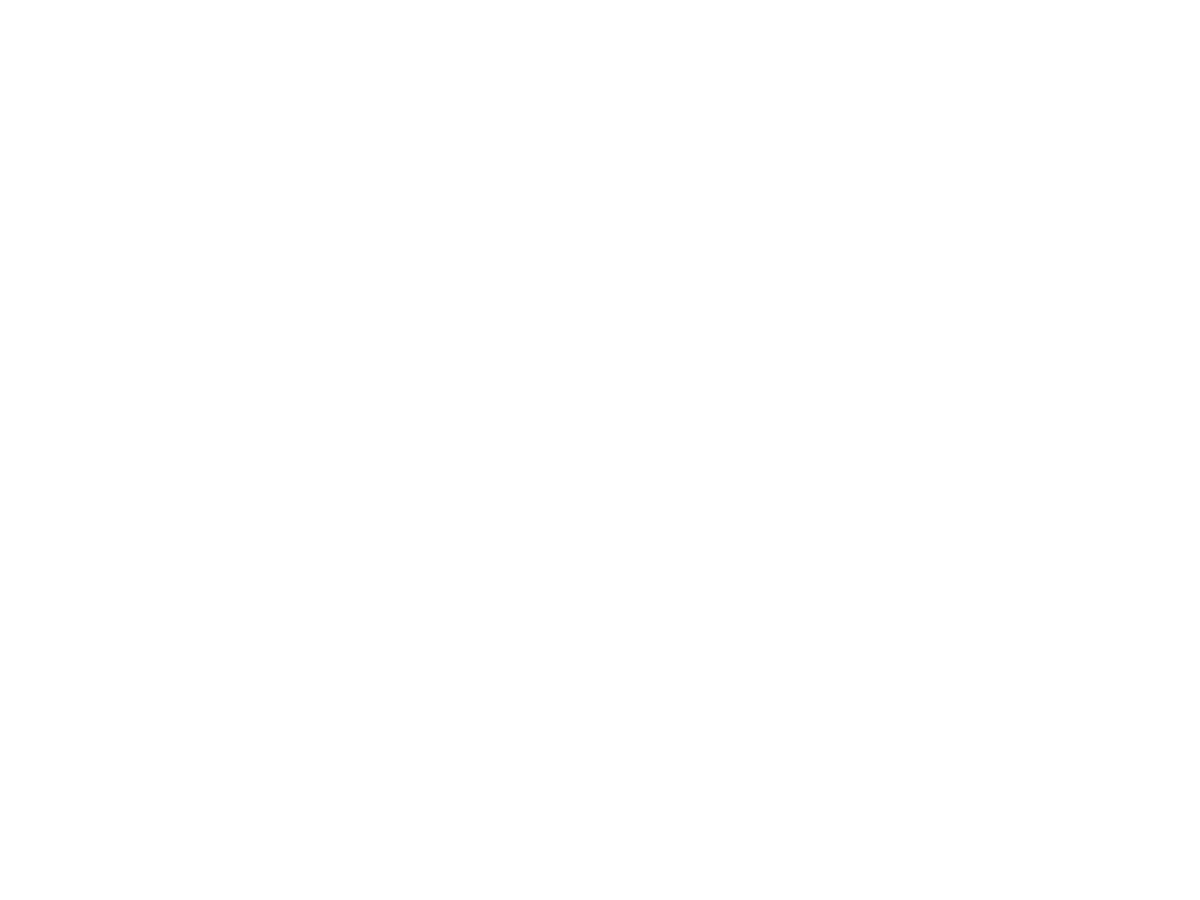

In [ ]:

    path_events = '/media/moritz/a80fe7e6-2bb9-4818-8add-17fb9bb673e1/Data/Bonobo/cluster_center/' 
    path_save= '/'
    list_events = [df_event.iloc[i]['file'].split('_')[0]+'_'+datetime.strftime(df_event.iloc[i]['time'],'%Y%m%d_%H%M%S') for i in range(100)]
    list_titles = list('file: '+df_event.iloc[i]['file'].split('_')[0]+'\n'+df_event.iloc[i]['annotation'])#+ '\ncluster: ' +df.location.astype(str))

    x_start = 0
    x_end = 15
    signal_start=0
    signal_end=15
    Fq = 128
    i = 0
    figsize = (12,9)

    fig, axs = plt.subplots(1,1,figsize=figsize)
    om = init_overview_module(data={'path_events':list_events,
                                    'titles':list_titles})

In [ ]:
    montage_module = init_montage_module(montages= [avg_montage,bipolar_montage])

    scaling_module = init_scaling_module(scaling_factor=1)
    title_module = init_title_module(list_titles)

    y_labels = montage_module.montage.y_labels
    y_locations =montage_module.montage.y_locations
    ax.set_ylim([y_locations[-1]-100,y_locations[0]+100])
    viewer_module = init_viewer_module(ax=ax,x_start=x_start,x_end=x_end,y_labels=y_labels,Fq=Fq,y_locations=y_locations)
    viewer_modules.append(viewer_module)
    scale_module = init_scale_module(ax)
    ax.set_xlim([0,15])

    event_module= init_event_module(signal_start=signal_start, signal_end=signal_end,Fq=Fq)

    refresh_wrapped = lambda: refresh(ax=axs,
                                  overview_module=om,
                                  event_module=event_module,
                                  montage_module=montage_module,
                                  viewer_modules=viewer_modules,
                                  title_module=title_module,
                                  scaling_module=scaling_module)

    ax.set_xlabel('time [s]')

    fig.canvas.mpl_connect('key_press_event',lambda event: action_list[event.key]())    
    plt.show()